# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Combine

In [12]:
# read 'Cleaned Data Services.csv'
services_df = pd.read_csv('Cleaned Data Services.csv', low_memory=False)
# drop column 0
services_df = services_df.drop(services_df.columns[0], axis=1)

# read 'Arrests Data Pre-Processed V3.csv'
arrests_df = pd.read_csv('Arrests Data Pre-Processed V3.csv', low_memory=False)

In [13]:
services_df

,Rpt_Dist,Area_Occ,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text,Dispatch_month_year,Dispatch_month,Dispatch_year,Dispatch_Hour,Call_Type_Code_Base,Call_Type_Code_Base_String
0,1184.0,Northeast,12/31/2010,23:59:41,507P,PARTY,2010-12,12,2010,23,507,507 MINOR DISTURBANC
1,1367.0,Newton,12/31/2010,23:59:39,9212N,TRESPASS SUSP NOW,2010-12,12,2010,23,9212,Trespass suspect
2,147.0,Central,12/31/2010,23:59:08,930W,WMN,2010-12,12,2010,23,930,930 SCREAMING
3,441.0,Hollenbeck,12/31/2010,23:58:57,246H,HEARD ONLY,2010-12,12,2010,23,246,246 SHOTS FIRED
4,514.0,Harbor,12/31/2010,23:58:51,242DS,DOM VIOL SUSP,2010-12,12,2010,23,242,242 BATTERY
...,...,...,...,...,...,...,...,...,...,...,...,...
15473575,1983.0,Mission,01/01/2023,00:03:47,242S,242 SUSP,2023-01,1,2023,0,242,242 BATTERY
15473576,701.0,Wilshire,01/01/2023,00:02:14,9065,906 VISUAL (C30 VICT,2023-01,1,2023,0,9065,906 VISUAL (C30 VICT
15473577,1781.0,Devonshire,01/01/2023,00:02:08,006,CODE 6,2023-01,1,2023,0,6,CODE 6
15473578,NaN,Outside,01/01/2023,00:02:07,006,CODE 6,2023-01,1,2023,0,6,CODE 6


In [14]:
arrests_columns_to_remove = ['Arrest Week Year', 'Address', 'Area ID', 'Report ID', 'Charge Group Code', 'Reporting District', 'Location']
arrests_df = arrests_df.drop(arrests_columns_to_remove, axis=1)
arrests_df

,Report Type,Arrest Date,Time,Area Name,Age,Sex Code,Charge Group Description,Charge Description,Disposition Description,LAT,LON,Mapped Descent Value,Mapped Arrest Type Value,Arrest Week,Month,Year
0,BOOKING,2010-06-22,18:45:00,Foothill,46,F,Larceny,GRAND THEFT MONEY/PROPERTY > $400,MISDEMEANOR COMPLAINT FILED,34.2375,-118.3745,White,Felony,25,6,2010
1,RFC,2012-09-28,09:30:00,Mission,60,M,Miscellaneous Other Violations,DRUNK DRIVING ALCOHOL/DRUGS,MISDEMEANOR COMPLAINT FILED,34.2111,-118.4309,Hispanic/Latin/Mexican,Misdemeanor,39,9,2012
2,RFC,2010-10-20,07:00:00,Southeast,14,M,Other Assaults,BATTERY,MISDEMEANOR COMPLAINT FILED,34.1025,-118.2091,Hispanic/Latin/Mexican,Misdemeanor,42,10,2010
3,RFC,2011-03-10,09:40:00,Wilshire,45,M,Drunkeness,DRINKING IN PUBLIC,MISDEMEANOR COMPLAINT FILED,34.0399,-118.3375,Black,Misdemeanor,10,3,2011
4,RFC,2012-04-01,17:15:00,Mission,37,M,Miscellaneous Other Violations,DRUNK DRIVING ALCOHOL/DRUGS,MISDEMEANOR COMPLAINT FILED,34.2208,-118.4662,Hispanic/Latin/Mexican,Misdemeanor,13,4,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519859,BOOKING,2022-10-25,12:50:00,Southeast,59,M,Narcotic Drug Laws,POSS/PURCHASE COCAINE BASE FOR SALE,FELONY COMPLAINT FILED,33.9345,-118.2623,Black,Felony,43,10,2022
1519860,RFC,2022-11-30,11:15:00,Rampart,61,M,Miscellaneous Other Violations,DRUNK DRIVING ALCOHOL/DRUGS,MISDEMEANOR COMPLAINT FILED,34.0601,-118.2761,Hispanic/Latin/Mexican,Infraction,48,11,2022
1519861,BOOKING,2022-10-03,05:10:00,Southwest,45,M,Miscellaneous Other Violations,VIOL DOMESTIC VIOL PROTECT/STAY AWAY ORD,MISDEMEANOR COMPLAINT FILED,34.0273,-118.3622,Hispanic/Latin/Mexican,Misdemeanor,40,10,2022
1519862,BOOKING,2022-09-26,09:50:00,Devonshire,25,M,Aggravated Assault,CORPORAL INJURY ON SPOUSE/COHABITANT/ETC,FELONY COMPLAINT FILED,34.2576,-118.5067,Hispanic/Latin/Mexican,Felony,39,9,2022


In [26]:
# find the mean LAT and LON grouped by the Area Name
lat_lon = arrests_df.groupby('Area Name').mean()[['LAT', 'LON']]
# Create a dictionary out of lat_lon
lat_lon_dict = lat_lon.to_dict()
services_df['LAT'] = services_df['Area_Occ'].apply(lambda x: lat_lon_dict['LAT'].get(x, np.nan))
services_df['LON'] = services_df['Area_Occ'].apply(lambda x: lat_lon_dict['LON'].get(x, np.nan))
services_df


,Rpt_Dist,Area_Occ,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text,Dispatch_month_year,Dispatch_month,Dispatch_year,Dispatch_Hour,Call_Type_Code_Base,Call_Type_Code_Base_String,LAT,LON
0,1184.0,Northeast,12/31/2010,23:59:41,507P,PARTY,2010-12,12,2010,23,507,507 MINOR DISTURBANC,34.011553,-117.913472
1,1367.0,Newton,12/31/2010,23:59:39,9212N,TRESPASS SUSP NOW,2010-12,12,2010,23,9212,Trespass suspect,33.883218,-117.821313
2,147.0,Central,12/31/2010,23:59:08,930W,WMN,2010-12,12,2010,23,930,930 SCREAMING,33.984732,-118.040376
3,441.0,Hollenbeck,12/31/2010,23:58:57,246H,HEARD ONLY,2010-12,12,2010,23,246,246 SHOTS FIRED,33.987432,-117.969646
4,514.0,Harbor,12/31/2010,23:58:51,242DS,DOM VIOL SUSP,2010-12,12,2010,23,242,242 BATTERY,33.629414,-117.794280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15473575,1983.0,Mission,01/01/2023,00:03:47,242S,242 SUSP,2023-01,1,2023,0,242,242 BATTERY,34.101565,-117.942339
15473576,701.0,Wilshire,01/01/2023,00:02:14,9065,906 VISUAL (C30 VICT,2023-01,1,2023,0,9065,906 VISUAL (C30 VICT,33.950202,-117.975632
15473577,1781.0,Devonshire,01/01/2023,00:02:08,006,CODE 6,2023-01,1,2023,0,6,CODE 6,34.169934,-118.262187
15473578,NaN,Outside,01/01/2023,00:02:07,006,CODE 6,2023-01,1,2023,0,6,CODE 6,NaN,NaN


In [27]:
# save services_df without index
services_df.to_csv('Dashboarding/services.csv', index=False)

# save arrests_df without index
arrests_df.to_csv('Dashboarding/arrests.csv', index=False)


# Further Cleaning

In [3]:
services_df = pd.read_csv('Dashboarding/services.csv')
arrests_df = pd.read_csv('Dashboarding/arrests.csv')

In [4]:
arrests_df

,Report Type,Arrest Date,Time,Area Name,Age,Sex Code,Charge Group Description,Charge Description,Disposition Description,LAT,LON,Mapped Descent Value,Mapped Arrest Type Value,Arrest Week,Month,Year
0,BOOKING,2010-06-22,18:45:00,Foothill,46,F,Larceny,GRAND THEFT MONEY/PROPERTY > $400,MISDEMEANOR COMPLAINT FILED,34.2375,-118.3745,White,Felony,25,6,2010
1,RFC,2012-09-28,09:30:00,Mission,60,M,Miscellaneous Other Violations,DRUNK DRIVING ALCOHOL/DRUGS,MISDEMEANOR COMPLAINT FILED,34.2111,-118.4309,Hispanic/Latin/Mexican,Misdemeanor,39,9,2012
2,RFC,2010-10-20,07:00:00,Southeast,14,M,Other Assaults,BATTERY,MISDEMEANOR COMPLAINT FILED,34.1025,-118.2091,Hispanic/Latin/Mexican,Misdemeanor,42,10,2010
3,RFC,2011-03-10,09:40:00,Wilshire,45,M,Drunkeness,DRINKING IN PUBLIC,MISDEMEANOR COMPLAINT FILED,34.0399,-118.3375,Black,Misdemeanor,10,3,2011
4,RFC,2012-04-01,17:15:00,Mission,37,M,Miscellaneous Other Violations,DRUNK DRIVING ALCOHOL/DRUGS,MISDEMEANOR COMPLAINT FILED,34.2208,-118.4662,Hispanic/Latin/Mexican,Misdemeanor,13,4,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519859,BOOKING,2022-10-25,12:50:00,Southeast,59,M,Narcotic Drug Laws,POSS/PURCHASE COCAINE BASE FOR SALE,FELONY COMPLAINT FILED,33.9345,-118.2623,Black,Felony,43,10,2022
1519860,RFC,2022-11-30,11:15:00,Rampart,61,M,Miscellaneous Other Violations,DRUNK DRIVING ALCOHOL/DRUGS,MISDEMEANOR COMPLAINT FILED,34.0601,-118.2761,Hispanic/Latin/Mexican,Infraction,48,11,2022
1519861,BOOKING,2022-10-03,05:10:00,Southwest,45,M,Miscellaneous Other Violations,VIOL DOMESTIC VIOL PROTECT/STAY AWAY ORD,MISDEMEANOR COMPLAINT FILED,34.0273,-118.3622,Hispanic/Latin/Mexican,Misdemeanor,40,10,2022
1519862,BOOKING,2022-09-26,09:50:00,Devonshire,25,M,Aggravated Assault,CORPORAL INJURY ON SPOUSE/COHABITANT/ETC,FELONY COMPLAINT FILED,34.2576,-118.5067,Hispanic/Latin/Mexican,Felony,39,9,2022


In [5]:
services_df

,Rpt_Dist,Area_Occ,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text,Dispatch_month_year,Dispatch_month,Dispatch_year,Dispatch_Hour,Call_Type_Code_Base,Call_Type_Code_Base_String,LAT,LON
0,1184.0,Northeast,12/31/2010,23:59:41,507P,PARTY,2010-12,12,2010,23,507,507 MINOR DISTURBANC,34.011553,-117.913472
1,1367.0,Newton,12/31/2010,23:59:39,9212N,TRESPASS SUSP NOW,2010-12,12,2010,23,9212,Trespass suspect,33.883218,-117.821313
2,147.0,Central,12/31/2010,23:59:08,930W,WMN,2010-12,12,2010,23,930,930 SCREAMING,33.984732,-118.040376
3,441.0,Hollenbeck,12/31/2010,23:58:57,246H,HEARD ONLY,2010-12,12,2010,23,246,246 SHOTS FIRED,33.987432,-117.969646
4,514.0,Harbor,12/31/2010,23:58:51,242DS,DOM VIOL SUSP,2010-12,12,2010,23,242,242 BATTERY,33.629414,-117.794280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15473575,1983.0,Mission,01/01/2023,00:03:47,242S,242 SUSP,2023-01,1,2023,0,242,242 BATTERY,34.101565,-117.942339
15473576,701.0,Wilshire,01/01/2023,00:02:14,9065,906 VISUAL (C30 VICT,2023-01,1,2023,0,9065,906 VISUAL (C30 VICT,33.950202,-117.975632
15473577,1781.0,Devonshire,01/01/2023,00:02:08,006,CODE 6,2023-01,1,2023,0,6,CODE 6,34.169934,-118.262187
15473578,NaN,Outside,01/01/2023,00:02:07,006,CODE 6,2023-01,1,2023,0,6,CODE 6,NaN,NaN


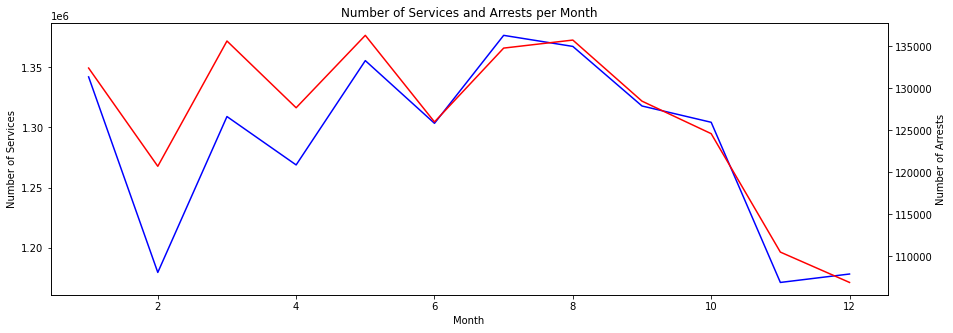

In [11]:
# line plot for value_counts of Dispatch_month and value_counts for arrests_df['Month'] with a secondary column
fig, ax = plt.subplots(figsize=(15, 5))
ax2 = ax.twinx()
sns.lineplot(x=services_df['Dispatch_month'].value_counts().index, y=services_df['Dispatch_month'].value_counts().values, ax=ax, color='blue')
sns.lineplot(x=arrests_df['Month'].value_counts().index, y=arrests_df['Month'].value_counts().values, ax=ax2, color='red')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Services')
ax2.set_ylabel('Number of Arrests')
plt.title('Number of Services and Arrests per Month')
plt.show()




In [28]:
arrests_services_month_df = services_df['Dispatch_month'].value_counts().sort_index().to_frame()
arrests_services_month_df['Arrests'] = arrests_df['Month'].value_counts().sort_index().values
# rename Dispatch_month to Services
arrests_services_month_df = arrests_services_month_df.rename(columns={'Dispatch_month': 'Services'})
# reset index and keep index as month
arrests_services_month_df = arrests_services_month_df.reset_index().rename(columns={'index': 'Month'})
# Add a column for naming the month from 1 as January, 2 as February, etc
arrests_services_month_df['Month Name'] = arrests_services_month_df['Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').month_name())
arrests_services_month_df.to_csv('Dashboarding/arrests_services_month_df.csv')
arrests_services_month_df

,Month,Services,Arrests,Month Name
0,1,1342057,132420,January
1,2,1179371,120730,February
2,3,1309056,135639,March
3,4,1268813,127695,April
4,5,1355586,136312,May
5,6,1303438,126009,June
6,7,1376615,134795,July
7,8,1367416,135750,August
8,9,1317849,128480,September
9,10,1304293,124612,October


In [26]:
# show day of week for arrests_df['Arrest Date']
arrests_df['Arrest Date Inter'] = pd.to_datetime(arrests_df['Arrest Date'])
arrests_services_week_df = arrests_df['Arrest Date Inter'].dt.dayofweek.value_counts().sort_index().to_frame()

# show day of week for services_df['Dispatch_Date']
services_df['Dispatch_Date Inter'] = pd.to_datetime(services_df['Dispatch_Date'])
arrests_services_week_df['Services'] = services_df['Dispatch_Date Inter'].dt.dayofweek.value_counts().sort_index()
# rename Arrest Date Inter to Arrests
arrests_services_week_df = arrests_services_week_df.rename(columns={'Arrest Date Inter': 'Arrests'})
# reset index and keep index as day of week
arrests_services_week_df = arrests_services_week_df.reset_index().rename(columns={'index': 'Day of Week'})
# Add a column for naming the day of the week
arrests_services_week_df['Day of Week Name'] = arrests_services_week_df['Day of Week'].apply(lambda x: ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'][x])
arrests_services_week_df.to_csv('Dashboarding/arrests_services_week_df.csv')
arrests_services_week_df

,Day of Week,Arrests,Services,Day of Week Name
0,0,176298,2102514,Monday
1,1,208655,2154887,Tuesday
2,2,246609,2191210,Wednesday
3,3,250050,2185687,Thursday
4,4,244378,2242529,Friday
5,5,214751,2342034,Saturday
6,6,179123,2254719,Sunday
